# Data Cleaning Studio

You are part of a team working for an agricultural nonprofit based in California. Your nonprofit focuses on helping farmers in the state grow profitable crops in environmentally-friendly ways in an effort to reduce the impact of climate change on the state and provide enough food for the state's 39.5 million residents. With Halloween on the horizon, you and your team are looking to analyze past pumpkin crops to try and answer several questions:
1. Are pumpkins sold at terminal markets in California (San Francisco and Los Angeles) grown in California?
1. Is the harvest season for pumpkins grown in California consistent year-to-year?
1. Are pumpkin farmers growing specific varieties of pumpkins for specific reasons?

The answers to these questions will help your nonprofit decide if they should promote specific varieties or growing practices to the farmers they serve in time for seeds to be planted next year. Your team has already performed some exploratory analysis on the San Francisco terminal market report of pumpkin sales from 9/2016-9/2017. Now it is time to clean the data!

---

## What You'll Learn

In this studio, you will practice:
- Identifying and handling missing data
- Removing unnecessary or irrelevant columns
- Dealing with inconsistent data formatting
- Making informed decisions about data cleaning strategies
- Documenting your reasoning for data cleaning choices

## How to Use This Notebook

This notebook is structured as a guided lab with questions and exercises. For each question:
1. **Read the instructions carefully** - They provide context and guidance
2. **Examine the code provided** - Some cells have working code for you to run and learn from
3. **Answer the reflection questions** - Write your thoughts in the designated answer cells
4. **Complete the tasks** - Some questions ask you to write your own code
5. **Run all cells in order** - The notebook builds on previous steps

---

## Column Reference Guide

Before diving in to cleaning the data, here is a quick guide to the different columns in the USDA report and what they mean:
- **Commodity Name:** This CSV structure is used for lots of USDA reports. In this case, the commodity is pumpkins
- **City Name:** City where the pumpkin was sold. The city is a terminal market location within the United States.
- **Type:** This refers to the type of farming used in growing the pumpkins
- **Package:** The way the pumpkins were packed for sale
- **Variety:** Specific type of pumpkin, i.e. pie pumpkin or a Howden pumpkin
- **Sub Variety:** Addition classifications about the pumpkins, i.e. is it a flat pumpkin?
- **Grade:** In the US, usually only canned pumpkin is graded
- **Date:** Date of sale (rounded up to the nearest Saturday)
- **Low Price:** This price is in reference to sale price
- **High Price:** This price is in reference to sale price
- **Mostly Low:** This column is not measured for pumpkins
- **Mostly High:** This column is not measured for pumpkins
- **Origin:** Which state the pumpkins were grown in
- **Origin District:** Additional information about pumpkins' origin location
- **Item Size:** Abbreviations denoting size, i.e. jbo = jumbo, lrg = large
- **Color:** Color of pumpkins
- **Environment:** Additional information about pumpkins' growing environment
- **Unit of Sale:** The unit the customer bought at market, i.e. if they bought pumpkins by the pound, the data should say "PER LB" or  if they bought pumpkins by the bin, it would say "PER BIN"
- **Quality:** Additional notes about pumpkin quality as necessary
- **Condition:** Additional notes about pumpkin condition as necessary
- **Appearance:** Additional notes about pumpkin appearance as necessary
- **Storage:** Additional notes about pumpkin storage as necessary
- **Crop:** Additional notes about pumpkin crop as necessary
- **Repack:** Whether the pumpkin has been repackaged before sale
- **Trans Mode:** Mode of transportation used to get pumpkins to terminal market

In [1]:
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("san-fransisco_9-24-2016_9-30-2017.csv")

In [2]:
data.head()

,Commodity Name,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,...,Color,Environment,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode
0,PUMPKINS,SAN FRANCISCO,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,155.0,155.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,PUMPKINS,SAN FRANCISCO,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/01/2016,155.0,155.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,PUMPKINS,SAN FRANCISCO,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/01/2016,155.0,155.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,PUMPKINS,SAN FRANCISCO,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/01/2016,135.0,135.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,PUMPKINS,SAN FRANCISCO,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/08/2016,135.0,150.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [3]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Commodity Name - 0%
City Name - 0%
Type - 78%
Package - 0%
Variety - 0%
Sub Variety - 61%
Grade - 100%
Date - 0%
Low Price - 0%
High Price - 0%
Mostly Low - 0%
Mostly High - 0%
Origin - 0%
Origin District - 100%
Item Size - 75%
Color - 72%
Environment - 100%
Unit of Sale - 100%
Quality - 100%
Condition - 100%
Appearance - 100%
Storage - 100%
Crop - 100%
Repack - 0%
Trans Mode - 100%


In [5]:
# Checking the overall percentage of missing data from the data set

total_cells = np.prod(data.shape)

missing_cells = pd.isnull(data).sum()

total_missing = missing_cells.sum()

percentage_missing = round((total_missing/total_cells), 2) *100

print(percentage_missing, "% Missing cells from the data")    

51.0 % Missing cells from the data


### Question 1: 

Look at the percentages of missing data per column. There are quite a few columns with less than 100% of the data.

**Instructions:**
For each column with missing data, decide what approach to take. Consider the following options:
1. **Drop the Observation** - Remove rows with missing values (best when few rows are affected)
2. **Drop the Feature** - Remove the entire column (best when most/all values are missing or the column isn't needed)
3. **Impute the Missing Values** - Fill in missing values using statistical methods (mean, median, mode)
4. **Replace the Missing Values** - Fill in missing values with a specific value that makes sense for your analysis

**Your Task:**
In the cell below, write down your decision for each column with missing data and explain your reasoning. Think about:
- How much data is missing?
- Is this column important for answering our research questions?
- What would be the most appropriate way to handle the missing values?

In [ ]:
# Answer Question 1 here:
'''
I will delete columns with over 75% missing: Type, Grade, Origin District, Environment, Unit of Sale, Quality, Condition, Appearance, Storage, Crop, Trans Mode
For columns with some missing values, I will replace the missing values with "Unknown": Item Size, Color, Sub Variety




In [11]:
# Repack Column
data["Repack"] = data["Repack"].replace({"N":False})
#Check status with a quick head check
data.head(3)

C:\Users\shelb\AppData\Local\Temp\ipykernel_17224\3670576720.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Repack"] = data["Repack"].replace({"N":False})


,Commodity Name,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,...,Color,Environment,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode
0,PUMPKINS,SAN FRANCISCO,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,155.0,155.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
1,PUMPKINS,SAN FRANCISCO,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/01/2016,155.0,155.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
2,PUMPKINS,SAN FRANCISCO,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/01/2016,155.0,155.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN


# Question 2:

Look at the "Type" column. This column contains two values, "Organic" and "NaN".  

When it comes to food, produce is typically designated as either "Organic" or "Conventional" based on farming practices.  

**For the purposes of this analysis**, we will make the assumption that if a pumpkin is not explicitly labeled as "Organic", it was grown using conventional farming methods.

Do you think this is a reasonable assumption to make? What are the potential risks or limitations of replacing NaN values with "Conventional"? Consider: Could NaN mean something else, like "unknown" or missing data?

In [ ]:
# Answers Question 2:
# The missing values could mean unknown, but considering that there are two primary designations I think it is reasonable to replace missing values with Conventional. 



In [12]:
# Fill the Missing Values in the Type Column
data["Type"] = data["Type"].fillna("Conventional")

# Question 3

Based on the information provided by our team, "Grade" is only applied to canned pumpkin. These were all uncanned, whole pumpkins. This column is irrelevant to the dataset.

**Instructions:**
We are going to drop the "Grade" column using the code in the cell below.

**Your Task:**
Before running the code, answer these questions:
- Do you agree with the decision to drop this column? Why or why not?
- What makes a column "irrelevant" or "unnecessary" for a dataset?
- Can you think of other situations where you might want to drop an entire column?

In [ ]:
# Answer Question 3 here:
# Yes, I agree with the decision to drop this column since it doesn't carry relevant data in this case. 
# Since this dataset only includes whole pumpkin, there is no need for the Grade column which only applies to canned pumpkin
# Another instance I would drop a whole column is if all of the data was missing or null--if it's not useful to my analysis then it can be deleted.

In [13]:
# Grade Column 
data = data.drop(["Grade"], axis=1) 

In [14]:
#Check with shape
data.shape

(166, 24)

# Question 4

Now it's your turn! Based on what you've learned, decide which other columns are relevant or irrelevant to our analysis.

**Reminder - Our Research Questions:**
1. Are pumpkins sold at terminal markets in California grown in California?
2. Is the harvest season for pumpkins grown in California consistent year-to-year?
3. Are pumpkin farmers growing specific varieties of pumpkins for specific reasons?

**Your Task:**
- Review the column descriptions at the top of this notebook
- Look at the missing data percentages from earlier
- Decide which columns you need to answer the research questions above
- Consider: Are some columns empty because the information doesn't apply to these pumpkins, or because the data wasn't collected?

**Questions to Answer:**
- Which columns do you think are empty for a reason? What reason?
- Is this intentional (the data doesn't apply) or unintentional (the data should be there but is missing)?
- Which columns should we drop, and why?

In [ ]:
# Explain your rationale briefly here: 
# Origin Districts might be unintentionally missing, but since I have the Origin column I am not concerned about the missing data and will delete the column.
# Environment, Quality, Condition, Appearance, Storage, Crop, Trans Mode, and Unit of Sale are irrelevant to my research questions and they only contain null data, so I can delete those



In [18]:
# Drop the ones you decide are irrelevant using the code we used to drop the "Grade Column"
data = data.drop(["Environment", "Quality", "Condition", "Appearance", "Storage", "Crop", "Trans Mode", "Unit of Sale", "Origin District"], axis=1) 

# Question 5:

Now let's examine the distribution of sales across different dates. The code below creates two visualizations:
1. A bar chart showing the count of sales transactions per date
2. A histogram showing the distribution of dates

**Instructions:**
- Run both visualization cells below
- Examine the patterns you see in the data

**Questions to consider:**
- What do you notice about the distribution of sales across time?
- Are there any dates with unusually high or low numbers of transactions?
- Does the data appear to be evenly distributed across the year, or are there seasonal patterns?

In [ ]:
# Answer 5 here:
# September 2017 and October 2016 have much higher sales than the rest of the dates.
# November 2016 is relatively high, except for 11/9 and 11/26
# December 2016 and January 2017 are low
# definitely seasonal pattern around Halloween


<Axes: xlabel='Date'>

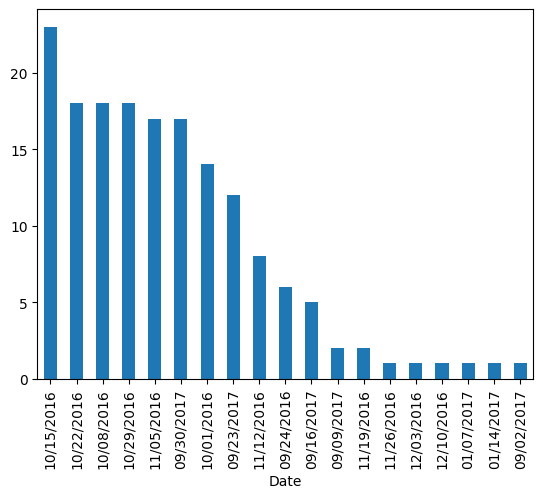

In [ ]:
# Bar chart - distribution of sales transactions per date
# This shows how many sales occurred on each date
data['Date'].value_counts().plot.bar()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, '09/24/2016'),
  Text(1, 0, '10/01/2016'),
  Text(2, 0, '10/08/2016'),
  Text(3, 0, '10/15/2016'),
  Text(4, 0, '10/22/2016'),
  Text(5, 0, '10/29/2016'),
  Text(6, 0, '11/05/2016'),
  Text(7, 0, '11/12/2016'),
  Text(8, 0, '09/09/2017'),
  Text(9, 0, '09/16/2017'),
  Text(10, 0, '09/23/2017'),
  Text(11, 0, '09/30/2017'),
  Text(12, 0, '11/19/2016'),
  Text(13, 0, '11/26/2016'),
  Text(14, 0, '12/03/2016'),
  Text(15, 0, '12/10/2016'),
  Text(16, 0, '01/07/2017'),
  Text(17, 0, '01/14/2017'),
  Text(18, 0, '09/02/2017')])

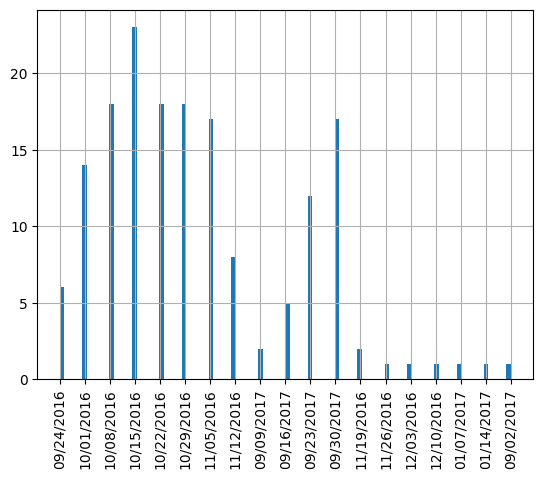

In [21]:
# Histogram showing the distribution of dates
data['Date'].hist(bins=100)
plt.xticks(rotation=90)

# Question 6:

Now let's think about data consistency. Inconsistent data often comes from inconsistent formatting - for example, dates written in different formats (10/01/2016 vs. October 1, 2016), or categories with different capitalization (ORGANIC vs. Organic vs. organic).

**Instructions:**
- Review the dataset columns, especially those with text/categorical data
- Look at the sample data shown in the `data.head()` output from earlier
- Think about the columns that might have formatting inconsistencies

**Your Task:**
Answer these questions:
- Are there any columns in this dataset where you're concerned about inconsistencies?
- Which columns would you want to check for formatting issues?
- What specific inconsistencies might you look for? (Examples: capitalization, spacing, abbreviations vs. full words, date formats)
- How would you check for these inconsistencies? (Hint: methods like `value_counts()`, `unique()`, or `str` methods might help)

In [ ]:
# Answer Question 6 here: 
# I would check City Name, Package, Variety, Sub Variety, Date, and Color for formatting inconsistencies.
# I would specifically look for capitalization, date formats, and abbreviations
# I would use .value_counts() and unique() to check for inconsistencies

